In [2]:
# if hit plotting library issues, try resetting LD path for julia
# can set in ~/.local/share/jupyter/kernels/
haskey(ENV, "LD_LIBRARY_PATH") && @assert ENV["LD_LIBRARY_PATH"] == ""
import Pkg
pkgs = [
    "Revise",
    "FASTX",
    "ProgressMeter",
    "DataFrames",
    "StatsBase",
    "StatsPlots",
    "OrderedCollections",
    "ColorSchemes",
    "uCSV"
]
Pkg.add(pkgs)
for pkg in pkgs
    eval(Meta.parse("import $pkg"))
end
# Pkg.develop(path="/global/cfs/projectdirs/m4269/cjprybol/Mycelia")
# Pkg.develop(path="../../..")
import Mycelia

   Resolving package versions...
┌ Warning: The active manifest file at `/global/cfs/cdirs/m4269/cjprybol/Mycelia/Manifest.toml` has an old format that is being maintained.
│ To update to the new format, which is supported by Julia versions ≥ 1.6.2, run `import Pkg; Pkg.upgrade_manifest()` which will upgrade the format without re-resolving.
│ To then record the julia version re-resolve with `Pkg.resolve()` and if there are resolve conflicts consider `Pkg.update()`.
└ @ Pkg.Types /global/u1/c/cjprybol/.julia/juliaup/julia-1.10.2+0.x64.linux.gnu/share/julia/stdlib/v1.10/Pkg/src/manifest.jl:318
  No Changes to `/global/cfs/cdirs/m4269/cjprybol/Mycelia/Project.toml`
  No Changes to `/global/cfs/cdirs/m4269/cjprybol/Mycelia/Manifest.toml`
┌ Warning: The active manifest file is an older format with no julia version entry. Dependencies may have been resolved with a different julia version.
└ @ /global/cfs/cdirs/m4269/cjprybol/Mycelia/Manifest.toml:0
[ Info: Precompiling Mycelia [453d265d-8292

In [147]:
function parse_rtg_eval_output(f)
    # import CodecZlib
    flines = readlines(CodecZlib.GzipDecompressorStream(open(f)))
    header_line = last(filter(fline -> occursin(r"^#", fline), flines))
    header = lstrip.(split(header_line, "\t"), '#')
    data_lines = filter(fline -> !occursin(r"^#", fline), flines)
    if isempty(data_lines)
        data = [Float64[] for i in 1:length(header)]
    else
        data, h = uCSV.read(IOBuffer(join(data_lines, '\n')), delim='\t')
    end
    # data = [[parse(Float64, x)] for x in split(last(flines), '\t')]
    # @show data, header
    DataFrames.DataFrame(data, header)
end

parse_rtg_eval_output (generic function with 1 method)

In [3]:
PROJECT_BASEDIR = dirname(pwd())
data_dir = joinpath(PROJECT_BASEDIR, "data")
genome_dir = mkpath(joinpath(data_dir, "genomes"))

"/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes"

In [4]:
original_fastas = sort(filter(x -> occursin(r"\.fna$", x) && !occursin("normalized", x), readdir(genome_dir, join=true)), by=x->filesize(x))

6-element Vector{String}:
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 41 bytes ⋯ "arking/data/genomes/fF3EHHs.fna"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 44 bytes ⋯ "ing/data/genomes/3NEzu1DmBy.fna"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 49 bytes ⋯ "ata/genomes/GCF_001610725.1.fna"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 46 bytes ⋯ "g/data/genomes/19tEIXfKKdzr.fna"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 49 bytes ⋯ "ata/genomes/GCF_024820135.1.fna"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 49 bytes ⋯ "ata/genomes/GCF_023169545.1.fna"

In [5]:
reference_variant_fastas = original_fastas .* ".normalized.vcf.fna"

6-element Vector{String}:
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 60 bytes ⋯ "/fF3EHHs.fna.normalized.vcf.fna"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 63 bytes ⋯ "Ezu1DmBy.fna.normalized.vcf.fna"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 68 bytes ⋯ "610725.1.fna.normalized.vcf.fna"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 65 bytes ⋯ "IXfKKdzr.fna.normalized.vcf.fna"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 68 bytes ⋯ "820135.1.fna.normalized.vcf.fna"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 68 bytes ⋯ "169545.1.fna.normalized.vcf.fna"

In [6]:
@assert all(isfile.(reference_variant_fastas))

In [7]:
fastqs = filter(x -> occursin(r"\.fq\.gz$", x), readdir(genome_dir, join=true))

203-element Vector{String}:
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 83 bytes ⋯ "lized.vcf.fna.art.1000x.1.fq.gz"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 89 bytes ⋯ "vcf.fna.art.1000x.1_val_1.fq.gz"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 83 bytes ⋯ "lized.vcf.fna.art.1000x.2.fq.gz"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 89 bytes ⋯ "vcf.fna.art.1000x.2_val_2.fq.gz"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 82 bytes ⋯ "alized.vcf.fna.art.100x.1.fq.gz"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 88 bytes ⋯ ".vcf.fna.art.100x.1_val_1.fq.gz"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 82 bytes ⋯ "alized.vcf.fna.art.100x.2.fq.gz"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 88 bytes ⋯ ".vcf.fna.art.100x.2_val_2.fq.gz"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 81 bytes ⋯ "malized.vcf.fna.art.10x.1.fq.gz"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 87 bytes ⋯ "d.vcf.fna.art.10x.1_val_1.fq.gz"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 81 bytes ⋯ "malized.vcf.fna.art.10x.2.fq.gz"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 87 bytes ⋯ "d.vcf.fna.art.10x.2_v

In [8]:
forward_fastqs = filter(x -> occursin("1_val_1.fq.gz", x), fastqs)

18-element Vector{String}:
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 89 bytes ⋯ "vcf.fna.art.1000x.1_val_1.fq.gz"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 88 bytes ⋯ ".vcf.fna.art.100x.1_val_1.fq.gz"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 87 bytes ⋯ "d.vcf.fna.art.10x.1_val_1.fq.gz"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 87 bytes ⋯ "vcf.fna.art.1000x.1_val_1.fq.gz"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 86 bytes ⋯ ".vcf.fna.art.100x.1_val_1.fq.gz"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 85 bytes ⋯ "d.vcf.fna.art.10x.1_val_1.fq.gz"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 92 bytes ⋯ "vcf.fna.art.1000x.1_val_1.fq.gz"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 91 bytes ⋯ ".vcf.fna.art.100x.1_val_1.fq.gz"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 90 bytes ⋯ "d.vcf.fna.art.10x.1_val_1.fq.gz"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 92 bytes ⋯ "vcf.fna.art.1000x.1_val_1.fq.gz"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 91 bytes ⋯ ".vcf.fna.art.100x.1_val_1.fq.gz"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 90 bytes ⋯ "d.vcf.fna.art.10x.1_va

In [9]:
reverse_fastqs = filter(x -> occursin("2_val_2.fq.gz", x), fastqs)

18-element Vector{String}:
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 89 bytes ⋯ "vcf.fna.art.1000x.2_val_2.fq.gz"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 88 bytes ⋯ ".vcf.fna.art.100x.2_val_2.fq.gz"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 87 bytes ⋯ "d.vcf.fna.art.10x.2_val_2.fq.gz"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 87 bytes ⋯ "vcf.fna.art.1000x.2_val_2.fq.gz"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 86 bytes ⋯ ".vcf.fna.art.100x.2_val_2.fq.gz"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 85 bytes ⋯ "d.vcf.fna.art.10x.2_val_2.fq.gz"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 92 bytes ⋯ "vcf.fna.art.1000x.2_val_2.fq.gz"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 91 bytes ⋯ ".vcf.fna.art.100x.2_val_2.fq.gz"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 90 bytes ⋯ "d.vcf.fna.art.10x.2_val_2.fq.gz"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 92 bytes ⋯ "vcf.fna.art.1000x.2_val_2.fq.gz"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 91 bytes ⋯ ".vcf.fna.art.100x.2_val_2.fq.gz"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 90 bytes ⋯ "d.vcf.fna.art.10x.2_va

In [10]:
long_read_fastqs = filter(x -> occursin("filtlong.fq.gz", x), fastqs)

18-element Vector{String}:
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 94 bytes ⋯ "na.badread.1000x.filtlong.fq.gz"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 93 bytes ⋯ "fna.badread.100x.filtlong.fq.gz"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 92 bytes ⋯ ".fna.badread.10x.filtlong.fq.gz"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 92 bytes ⋯ "na.badread.1000x.filtlong.fq.gz"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 91 bytes ⋯ "fna.badread.100x.filtlong.fq.gz"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 90 bytes ⋯ ".fna.badread.10x.filtlong.fq.gz"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 97 bytes ⋯ "na.badread.1000x.filtlong.fq.gz"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 96 bytes ⋯ "fna.badread.100x.filtlong.fq.gz"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 95 bytes ⋯ ".fna.badread.10x.filtlong.fq.gz"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 97 bytes ⋯ "na.badread.1000x.filtlong.fq.gz"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 96 bytes ⋯ "fna.badread.100x.filtlong.fq.gz"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 95 bytes ⋯ ".fna.badread.10x.filtl

In [29]:
assembly_table = DataFrames.DataFrame(
    original_fasta = String[],
    reference_variant_fasta = String[],
    coverage = String[],
    fastqs = Vector{String}[],
    assembler = String[],
    assembled_variant_fasta = String[]
)

assemblers = [
    "megahit",
    "spades_isolate",
    "flye",
    "raven",
    "hifiasm",
    "mycelia-lr",
    "mycelia-sr"
]
coverages = ["10x", "100x", "1000x"]

for (original_fasta, reference_variant_fasta) in zip(original_fastas, reference_variant_fastas)
    reference_variant_fasta_matches = filter(x -> occursin(reference_variant_fasta, x), readdir(genome_dir, join=true))
    for coverage in coverages
        coverage_matches = filter(x -> occursin(coverage, x), reference_variant_fasta_matches)
        for assembler in assemblers
            # @show coverage_matches
            if assembler == "mycelia-lr"
                assembly_matches = filter(x -> occursin(r"\.fna$", x) && occursin("badread", x) && !occursin("joint", x), coverage_matches)
                # @show assembly_matches
                @assert 0 <= length(assembly_matches) <= 1
                if isempty(assembly_matches)
                    continue
                else
                    assembled_variant_fasta = first(assembly_matches)
                    matching_fastqs = filter(x -> occursin(coverage, x) && occursin(reference_variant_fasta, x), long_read_fastqs)
                    # @show assembled_variant_fasta
                    # @show matching_fastqs
                end
            elseif assembler == "mycelia-sr"
                assembly_matches = filter(x -> occursin(r"\.fna$", x) && occursin("art", x) && !occursin(r"\.joint\.fna$", x), coverage_matches)
                if isempty(assembly_matches)
                    continue
                else
                    assembled_variant_fasta = first(assembly_matches)
                    matching_fastqs = filter(x -> occursin(coverage, x) && occursin(reference_variant_fasta, x), vcat(forward_fastqs, reverse_fastqs))
                    # @show assembled_variant_fasta
                    # @show matching_fastqs
                end
            else
                directories = filter(x -> isdir(x) && occursin(assembler, x), coverage_matches)
                if !isempty(directories)
                    # directory = missing
                    @assert length(directories) == 1 "$(reference_variant_fasta) $(assembler) $(coverage)"
                    directory = first(directories)
                else
                    continue
                end
                if assembler == "megahit"
                    assembled_variant_fasta = joinpath(directory, "final.contigs.fa")
                    matching_fastqs = filter(x -> occursin(coverage, x) && occursin(reference_variant_fasta, x), vcat(forward_fastqs, reverse_fastqs))
                elseif assembler == "spades_isolate"
                    assembled_variant_fasta = joinpath(directory, "scaffolds.fasta")
                    matching_fastqs = filter(x -> occursin(coverage, x) && occursin(reference_variant_fasta, x), vcat(forward_fastqs, reverse_fastqs))
                elseif assembler == "flye"
                    assembled_variant_fasta = joinpath(directory, "assembly.fasta")
                    matching_fastqs = filter(x -> occursin(coverage, x) && occursin(reference_variant_fasta, x), long_read_fastqs)
                elseif assembler == "raven"
                    assembled_variant_fasta = joinpath(directory, "assembly.fasta")
                    matching_fastqs = filter(x -> occursin(coverage, x) && occursin(reference_variant_fasta, x), long_read_fastqs)
                elseif assembler == "hifiasm"
                    directory_fastas = filter(x -> occursin(r"\.hifiasm\.p_ctg\.gfa\.fna$", x), readdir(directory))
                    # @show directory_fastas
                    @assert length(directory_fastas) <= 1
                    if length(directory_fastas) == 0
                        continue
                    else
                        assembled_variant_fasta = joinpath(directory, "assembly.fasta")
                        if !isfile(assembled_variant_fasta)
                            cp(joinpath(directory, first(directory_fastas)), assembled_variant_fasta)
                        end
                        matching_fastqs = filter(x -> occursin(coverage, x) && occursin(original_fasta, x), long_read_fastqs)
                    end
                end
            end
            if !isnothing(assembled_variant_fasta)
                push!(assembly_table, (original_fasta=original_fasta, reference_variant_fasta=reference_variant_fasta, assembler=assembler, coverage=coverage, fastqs=matching_fastqs, assembled_variant_fasta=assembled_variant_fasta))
            end
        end
    end
end
assembly_table

Row,original_fasta,reference_variant_fasta,coverage,fastqs,assembler,assembled_variant_fasta
,String,String,String,Array…,String,String
1,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna,10x,"[""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x.1_val_1.fq.gz"", ""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x.2_val_2.fq.gz""]",megahit,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x_megahit/final.contigs.fa
2,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna,10x,"[""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x.1_val_1.fq.gz"", ""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x.2_val_2.fq.gz""]",spades_isolate,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x_spades_isolate/scaffolds.fasta
3,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna,10x,"[""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.badread.10x.filtlong.fq.gz""]",flye,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.badread.10x.filtlong.fq.gz_flye/assembly.fasta
4,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna,10x,"[""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.badread.10x.filtlong.fq.gz""]",raven,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.badread.10x.filtlong.fq.gz_raven/assembly.fasta
5,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna,10x,"[""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.badread.10x.filtlong.fq.gz""]",hifiasm,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.badread.10x.filtlong.fq.gz_hifiasm/assembly.fasta
6,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna,10x,"[""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.badread.10x.filtlong.fq.gz""]",mycelia-lr,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.badread.10x.filtlong.k11.k13.k17.k19.k23.k31.k53.k89.assembly_k379.fna
7,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna,/global/cfs/cdirs/m4269/cjprybol/Mycelia/pr

In [30]:
assembly_table = assembly_table[map(x -> isfile(x) && filesize(x) > 0, assembly_table[!, "assembled_variant_fasta"]), :]

Row,original_fasta,reference_variant_fasta,coverage,fastqs,assembler,assembled_variant_fasta
,String,String,String,Array…,String,String
1,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna,10x,"[""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x.1_val_1.fq.gz"", ""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x.2_val_2.fq.gz""]",megahit,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x_megahit/final.contigs.fa
2,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna,10x,"[""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x.1_val_1.fq.gz"", ""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x.2_val_2.fq.gz""]",spades_isolate,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x_spades_isolate/scaffolds.fasta
3,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna,10x,"[""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.badread.10x.filtlong.fq.gz""]",mycelia-lr,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.badread.10x.filtlong.k11.k13.k17.k19.k23.k31.k53.k89.assembly_k379.fna
4,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna,10x,"[""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x.1_val_1.fq.gz"", ""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x.2_val_2.fq.gz""]",mycelia-sr,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x.joint.k11.k13.k17.k19.k23.k31.k53.k89.assembly_k89.fna
5,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna,100x,"[""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.100x.1_val_1.fq.gz"", ""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.100x.2_val_2.fq.gz""]",megahit,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.100x_megahit/final.contigs.fa
6,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna,100x,"[""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.100x.1_val_1.fq.gz"", ""/global/cfs/cdirs/m4269/cjpry

In [31]:
# assembly_table_to_visualize[!, "reference_variant_calls"] = assembly_table_to_visualize[!, "reference_variant_calls"] .* ".gz"
assembly_table[!, "reference_variant_calls"] .= replace.(assembly_table[!, "reference_variant_fasta"], r"\.fna$" => ".gz")

65-element Vector{String}:
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 56 bytes ⋯ "omes/fF3EHHs.fna.normalized.vcf"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 56 bytes ⋯ "omes/fF3EHHs.fna.normalized.vcf"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 56 bytes ⋯ "omes/fF3EHHs.fna.normalized.vcf"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 56 bytes ⋯ "omes/fF3EHHs.fna.normalized.vcf"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 56 bytes ⋯ "omes/fF3EHHs.fna.normalized.vcf"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 56 bytes ⋯ "omes/fF3EHHs.fna.normalized.vcf"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 56 bytes ⋯ "omes/fF3EHHs.fna.normalized.vcf"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 56 bytes ⋯ "omes/fF3EHHs.fna.normalized.vcf"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 56 bytes ⋯ "omes/fF3EHHs.fna.normalized.vcf"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 56 bytes ⋯ "omes/fF3EHHs.fna.normalized.vcf"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 56 bytes ⋯ "omes/fF3EHHs.fna.normalized.vcf"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 56 bytes ⋯ "omes/fF3EHHs.fna.norma

In [32]:
mycelia_subset = assembly_table[map(x -> occursin("mycelia", x), assembly_table[!, "assembler"]), ["coverage", "fastqs", "original_fasta"]]

Row,coverage,fastqs,original_fasta
,String,Array…,String
1,10x,"[""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.badread.10x.filtlong.fq.gz""]",/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna
2,10x,"[""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x.1_val_1.fq.gz"", ""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x.2_val_2.fq.gz""]",/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna
3,100x,"[""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.badread.100x.filtlong.fq.gz""]",/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna
4,100x,"[""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.100x.1_val_1.fq.gz"", ""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.100x.2_val_2.fq.gz""]",/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna
5,1000x,"[""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.1000x.1_val_1.fq.gz"", ""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.1000x.2_val_2.fq.gz""]",/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna
6,10x,"[""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/3NEzu1DmBy.fna.normalized.vcf.fna.badread.10x.filtlong.fq.gz""]",/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/3NEzu1DmBy.fna
7,10x,"[""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/3NEzu1DmBy.fna.normalized.vcf.fna.art.10x.1_val_1.fq.gz"", ""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/3NEzu1DmBy.fna.normalized.vcf.fna.art.10x.2_val_2.fq.gz""]",/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/3NEzu1DmBy.fna
8,100x,"[""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/3NEzu1DmBy.fna.normalized.vcf.fna.art.100x.1_val_1.fq.gz"", ""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/3NEzu1DmBy.fna.normalized.vcf.fna.art.100x.2_val_2.fq.gz""]",/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/3NEzu1DmBy.fna
9,10x,"[""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/GCF_001610725.1.fna.normalized.vcf.fna.badread.10x.filtlong.fq.gz""]",/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/GCF_001610725.1.fna


In [33]:
assembly_table = DataFrames.innerjoin(assembly_table, mycelia_subset, on=["coverage", "fastqs", "original_fasta"])

Row,original_fasta,reference_variant_fasta,coverage,fastqs,assembler,assembled_variant_fasta,reference_variant_calls
,String,String,String,Array…,String,String,String
1,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna,10x,"[""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x.1_val_1.fq.gz"", ""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x.2_val_2.fq.gz""]",megahit,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x_megahit/final.contigs.fa,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf
2,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna,10x,"[""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x.1_val_1.fq.gz"", ""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x.2_val_2.fq.gz""]",spades_isolate,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x_spades_isolate/scaffolds.fasta,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf
3,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna,10x,"[""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.badread.10x.filtlong.fq.gz""]",mycelia-lr,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.badread.10x.filtlong.k11.k13.k17.k19.k23.k31.k53.k89.assembly_k379.fna,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf
4,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna,10x,"[""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x.1_val_1.fq.gz"", ""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x.2_val_2.fq.gz""]",mycelia-sr,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x.joint.k11.k13.k17.k19.k23.k31.k53.k89.assembly_k89.fna,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf
5,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna,100x,"[""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.100x.1_val_1.fq.gz"", ""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.100x.2_val_2.fq.gz""]",megahit,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-be

In [34]:



# assembly_table[!, "reference_assembly"] = replace.(assembly_table[!, "reference_assembly"], "$(genome_dir)/" => "")
# assembly_table[!, "fasta"] = replace.(assembly_table[!, "fasta"], "$(genome_dir)/" => "")

# drop files that aren't there or are empty




genome_coverages_to_visualize = [x[1] for x in filter(x -> x[2] > 1, StatsBase.countmap(collect(eachrow(Matrix(unique(assembly_table[!, ["original_fasta", "coverage", "fastqs"]])[!, ["original_fasta", "coverage"]])))))]
assembly_table_to_visualize = DataFrames.innerjoin(
    assembly_table,
    DataFrames.DataFrame(original_fasta = [x[1] for x in genome_coverages_to_visualize], coverage = [x[2] for x in genome_coverages_to_visualize]),
    on=["original_fasta", "coverage"]
)

Row,original_fasta,reference_variant_fasta,coverage,fastqs,assembler,assembled_variant_fasta,reference_variant_calls
,String,String,String,Array…,String,String,String
1,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna,10x,"[""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x.1_val_1.fq.gz"", ""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x.2_val_2.fq.gz""]",megahit,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x_megahit/final.contigs.fa,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf
2,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna,10x,"[""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x.1_val_1.fq.gz"", ""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x.2_val_2.fq.gz""]",spades_isolate,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x_spades_isolate/scaffolds.fasta,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf
3,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna,10x,"[""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.badread.10x.filtlong.fq.gz""]",mycelia-lr,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.badread.10x.filtlong.k11.k13.k17.k19.k23.k31.k53.k89.assembly_k379.fna,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf
4,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna,10x,"[""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x.1_val_1.fq.gz"", ""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x.2_val_2.fq.gz""]",mycelia-sr,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x.joint.k11.k13.k17.k19.k23.k31.k53.k89.assembly_k89.fna,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf
5,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna,100x,"[""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.100x.1_val_1.fq.gz"", ""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.100x.2_val_2.fq.gz""]",megahit,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-be

In [35]:
assembly_qv_results = DataFrames.DataFrame()
for row in DataFrames.eachrow(assembly_table_to_visualize)
    assembly_result_table = Mycelia.assess_assembly_quality(assembly=row["assembled_variant_fasta"], observations=row["fastqs"])
    assembly_result_table[!, "assembled_variant_fasta"] .= row["assembled_variant_fasta"]
    append!(assembly_qv_results, assembly_result_table)
end
assembly_qv_results_to_visualize = DataFrames.innerjoin(assembly_table_to_visualize, assembly_qv_results, on="assembled_variant_fasta")
# max_qv_value = (ceil(maximum(filter(x -> x != Inf, assembly_qv_results_to_visualize[!, "qv"])) / 10) + 2) * 10
max_qv_value = 100
assembly_qv_results_to_visualize[!, "qv"] = map(x -> x == Inf ? max_qv_value : x, assembly_qv_results_to_visualize[!, "qv"])
assembly_qv_results_to_visualize

Progress: 100%|█████████████████████████████████████████| Time: 0:00:08
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


Row,original_fasta,reference_variant_fasta,coverage,fastqs,assembler,assembled_variant_fasta,reference_variant_calls,k,cosine_distance,js_divergence,qv
,String,String,String,Array…,String,String,String,Int64,Float64,Float64,Real
1,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna,10x,"[""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x.1_val_1.fq.gz"", ""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x.2_val_2.fq.gz""]",megahit,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x_megahit/final.contigs.fa,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf,11,0.0,0.0,100
2,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna,10x,"[""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x.1_val_1.fq.gz"", ""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x.2_val_2.fq.gz""]",megahit,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x_megahit/final.contigs.fa,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf,13,0.0,0.0,100
3,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna,10x,"[""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x.1_val_1.fq.gz"", ""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x.2_val_2.fq.gz""]",megahit,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x_megahit/final.contigs.fa,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf,17,0.0,0.0,100
4,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna,10x,"[""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x.1_val_1.fq.gz"", ""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x.2_val_2.fq.gz""]",megahit,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x_megahit/final.contigs.fa,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf,19,0.0,0.0,100
5,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna,10x,"[""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x.1_val_1.fq.gz"", ""/global/cfs/cdirs/m4269/cjprybol/Mycelia/project

In [36]:
ks = sort(unique(assembly_qv_results_to_visualize[!, "k"]))

7-element Vector{Int64}:
 11
 13
 17
 19
 23
 31
 53

In [45]:
assemblers = sort(append!(unique(assembly_qv_results_to_visualize[!, "assembler"]), ["hifiasm", "raven"]))
reference_variant_fasta_coverage_groups = DataFrames.groupby(assembly_qv_results_to_visualize, ["reference_variant_fasta", "coverage"])

Row,original_fasta,reference_variant_fasta,coverage,fastqs,assembler,assembled_variant_fasta,reference_variant_calls,k,cosine_distance,js_divergence,qv
,String,String,String,Array…,String,String,String,Int64,Float64,Float64,Real
1,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna,10x,"[""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x.1_val_1.fq.gz"", ""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x.2_val_2.fq.gz""]",megahit,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x_megahit/final.contigs.fa,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf,11,0.0,0.0,100
2,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna,10x,"[""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x.1_val_1.fq.gz"", ""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x.2_val_2.fq.gz""]",megahit,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x_megahit/final.contigs.fa,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf,13,0.0,0.0,100
3,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna,10x,"[""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x.1_val_1.fq.gz"", ""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x.2_val_2.fq.gz""]",megahit,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x_megahit/final.contigs.fa,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf,17,0.0,0.0,100
4,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna,10x,"[""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x.1_val_1.fq.gz"", ""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x.2_val_2.fq.gz""]",megahit,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x_megahit/final.contigs.fa,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf,19,0.0,0.0,100
5,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna,10x,"[""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x.1_val_1.fq.gz"", ""/global/cfs/cdirs/m4269/cjprybol/Mycelia/project

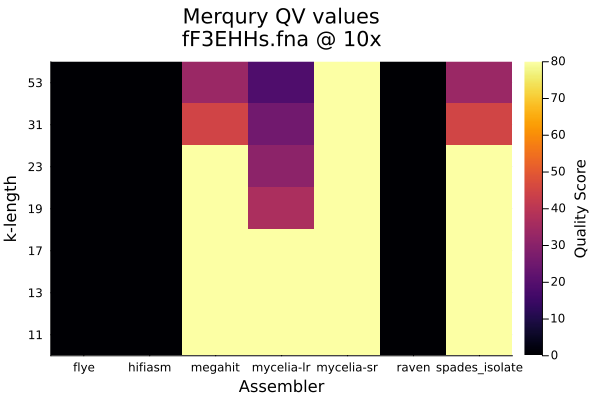

In [46]:
reference_variant_fasta_coverage_group = reference_variant_fasta_coverage_groups[1]
this_fasta = basename(reference_variant_fasta_coverage_group[1, "original_fasta"])
this_coverage = reference_variant_fasta_coverage_group[1, "coverage"]
# group_assembly_qv_scores = OrderedCollections.OrderedDict(assembler => Vector{Union{Float64, Missing}}(missing, length(ks)) for assembler in assemblers)
group_assembly_qv_scores = OrderedCollections.OrderedDict(assembler => zeros(length(ks)) for assembler in assemblers)
for assembler_group in DataFrames.groupby(reference_variant_fasta_coverage_group, "assembler")
    assembler = assembler_group[1, "assembler"]
    sag = sort(assembler_group)
    scores = Float64[]
    for (i, (row, k)) in enumerate(zip(DataFrames.eachrow(sag), ks))
        @assert row["k"] == k
        push!(scores, row["qv"])
    end
    group_assembly_qv_scores[assembler] = scores
end
StatsPlots.heatmap(
    reduce(hcat, [group_assembly_qv_scores[assembler] for assembler in assemblers]),
    xlabel = "Assembler",
    ylabel = "k-length",
    xticks = (1:length(assemblers), assemblers),
    yticks = (1:length(ks), ks),
    title = "Merqury QV values\n$(this_fasta) @ $(this_coverage)",
    colorbar_title = "Quality Score",
    size = (600, 400),
    clims=(0,80),
    topmargin=5StatsPlots.Plots.PlotMeasures.mm
)

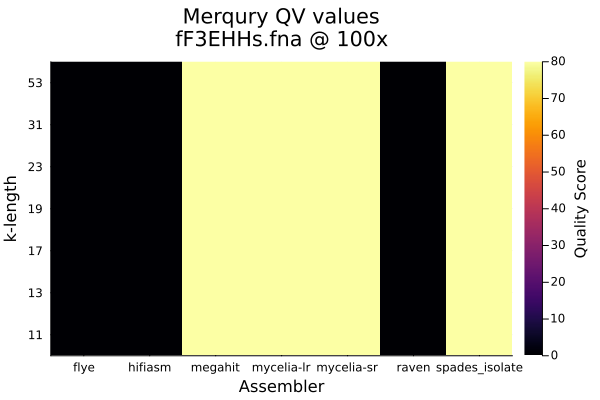

In [47]:
reference_variant_fasta_coverage_group = reference_variant_fasta_coverage_groups[2]
this_fasta = basename(reference_variant_fasta_coverage_group[1, "original_fasta"])
this_coverage = reference_variant_fasta_coverage_group[1, "coverage"]
# group_assembly_qv_scores = OrderedCollections.OrderedDict(assembler => Vector{Union{Float64, Missing}}(missing, length(ks)) for assembler in assemblers)
group_assembly_qv_scores = OrderedCollections.OrderedDict(assembler => zeros(length(ks)) for assembler in assemblers)
for assembler_group in DataFrames.groupby(reference_variant_fasta_coverage_group, "assembler")
    assembler = assembler_group[1, "assembler"]
    sag = sort(assembler_group)
    scores = Float64[]
    for (i, (row, k)) in enumerate(zip(DataFrames.eachrow(sag), ks))
        @assert row["k"] == k
        push!(scores, row["qv"])
    end
    group_assembly_qv_scores[assembler] = scores
end
StatsPlots.heatmap(
    reduce(hcat, [group_assembly_qv_scores[assembler] for assembler in assemblers]),
    xlabel = "Assembler",
    ylabel = "k-length",
    xticks = (1:length(assemblers), assemblers),
    yticks = (1:length(ks), ks),
    title = "Merqury QV values\n$(this_fasta) @ $(this_coverage)",
    colorbar_title = "Quality Score",
    size = (600, 400),
    clims=(0,80),
    topmargin=5StatsPlots.Plots.PlotMeasures.mm
)

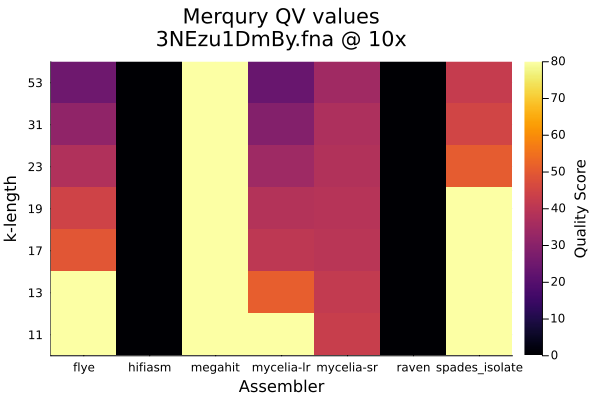

In [48]:
reference_variant_fasta_coverage_group = reference_variant_fasta_coverage_groups[3]
this_fasta = basename(reference_variant_fasta_coverage_group[1, "original_fasta"])
this_coverage = reference_variant_fasta_coverage_group[1, "coverage"]
# group_assembly_qv_scores = OrderedCollections.OrderedDict(assembler => Vector{Union{Float64, Missing}}(missing, length(ks)) for assembler in assemblers)
group_assembly_qv_scores = OrderedCollections.OrderedDict(assembler => zeros(length(ks)) for assembler in assemblers)
for assembler_group in DataFrames.groupby(reference_variant_fasta_coverage_group, "assembler")
    assembler = assembler_group[1, "assembler"]
    sag = sort(assembler_group)
    scores = Float64[]
    for (i, (row, k)) in enumerate(zip(DataFrames.eachrow(sag), ks))
        @assert row["k"] == k
        push!(scores, row["qv"])
    end
    group_assembly_qv_scores[assembler] = scores
end
StatsPlots.heatmap(
    reduce(hcat, [group_assembly_qv_scores[assembler] for assembler in assemblers]),
    xlabel = "Assembler",
    ylabel = "k-length",
    xticks = (1:length(assemblers), assemblers),
    yticks = (1:length(ks), ks),
    title = "Merqury QV values\n$(this_fasta) @ $(this_coverage)",
    colorbar_title = "Quality Score",
    size = (600, 400),
    clims=(0,80),
    topmargin=5StatsPlots.Plots.PlotMeasures.mm
)

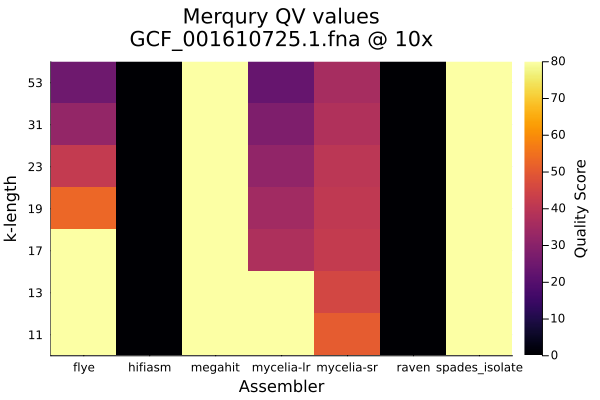

In [49]:
reference_variant_fasta_coverage_group = reference_variant_fasta_coverage_groups[4]
this_fasta = basename(reference_variant_fasta_coverage_group[1, "original_fasta"])
this_coverage = reference_variant_fasta_coverage_group[1, "coverage"]
# group_assembly_qv_scores = OrderedCollections.OrderedDict(assembler => Vector{Union{Float64, Missing}}(missing, length(ks)) for assembler in assemblers)
group_assembly_qv_scores = OrderedCollections.OrderedDict(assembler => zeros(length(ks)) for assembler in assemblers)
for assembler_group in DataFrames.groupby(reference_variant_fasta_coverage_group, "assembler")
    assembler = assembler_group[1, "assembler"]
    sag = sort(assembler_group)
    scores = Float64[]
    for (i, (row, k)) in enumerate(zip(DataFrames.eachrow(sag), ks))
        @assert row["k"] == k
        push!(scores, row["qv"])
    end
    group_assembly_qv_scores[assembler] = scores
end
StatsPlots.heatmap(
    reduce(hcat, [group_assembly_qv_scores[assembler] for assembler in assemblers]),
    xlabel = "Assembler",
    ylabel = "k-length",
    xticks = (1:length(assemblers), assemblers),
    yticks = (1:length(ks), ks),
    title = "Merqury QV values\n$(this_fasta) @ $(this_coverage)",
    colorbar_title = "Quality Score",
    size = (600, 400),
    clims=(0,80),
    topmargin=5StatsPlots.Plots.PlotMeasures.mm
)

In [42]:
Mycelia.add_bioconda_env("vg")
Mycelia.add_bioconda_env("pggb")

[ Info: conda environment vg already present; set force=true to update/re-install
[ Info: conda environment pggb already present; set force=true to update/re-install


In [50]:
pggb_vcfs

18-element Vector{String}:
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 182 bytes ⋯ "8.db7e83b.smooth.final.gfa.vcf"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 187 bytes ⋯ "8.db7e83b.smooth.final.gfa.vcf"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 305 bytes ⋯ "8.db7e83b.smooth.final.gfa.vcf"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 289 bytes ⋯ "8.db7e83b.smooth.final.gfa.vcf"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 183 bytes ⋯ "8.db7e83b.smooth.final.gfa.vcf"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 188 bytes ⋯ "8.db7e83b.smooth.final.gfa.vcf"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 307 bytes ⋯ "8.db7e83b.smooth.final.gfa.vcf"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 291 bytes ⋯ "8.db7e83b.smooth.final.gfa.vcf"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 185 bytes ⋯ "8.db7e83b.smooth.final.gfa.vcf"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 190 bytes ⋯ "8.db7e83b.smooth.final.gfa.vcf"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 197 bytes ⋯ "8.db7e83b.smooth.final.gfa.vcf"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 311 bytes ⋯ "8.db7e83b.smooth.fina

In [51]:
# pggb_vcfs = String[]
# ProgressMeter.@showprogress for row in DataFrames.eachrow(assembly_table_to_visualize)
#     # if (isfile(row["original_fasta"]) && isfile(row["assembled_variant_fasta"]))
#     genomes = [row["original_fasta"], row["assembled_variant_fasta"]]
#     joint_fasta = row["assembled_variant_fasta"] * "." * "joint.fna"
#     @show joint_fasta
#     outdir = joint_fasta * "__PGGB"
#     @show outdir
#     # if !isfile(joint_fasta)
#         # don't merge since that adds the filename into the identifier and PGGB doesn't like the file names
#         # Mycelia.merge_fasta_files(fasta_files=genomes, fasta_file=joint_fasta)
#     Mycelia.concatenate_files(files=genomes, file=joint_fasta)
#     # # end
#     # if !isfile(joint_fasta * ".fai")
#     isfile(joint_fasta * ".fai") && rm(joint_fasta * ".fai")
#     Mycelia.samtools_index_fasta(fasta=joint_fasta)
#     # @show outdir
#     # end
#     isdir(outdir) && rm(outdir, recursive=true)
#     # if !isdir(outdir) || isempty(outdir)
#     cmd = `$(Mycelia.CONDA_RUNNER) run --live-stream -n pggb pggb -i $(joint_fasta) -o $(outdir) --segment-length 100 -t 2 -n 2`
#     run(cmd)
#     # # else
#     # #     @show isdir(outdir)
#     # #     @show readdir(outdir)
#     # end
#     gfa_file = first(filter(x -> occursin(r"\.gfa", x), readdir(outdir, join=true)))
#     # # @show gfa_file
#     final_vcf = gfa_file * ".vcf"
#     push!(pggb_vcfs, final_vcf)
#     @assert isfile(gfa_file)
#     # if !isfile(final_vcf) || (filesize(final_vcf) == 0)
#     path_prefix = FASTX.identifier(first(Mycelia.open_fastx(row["original_fasta"])))
#     @show path_prefix
#     # path_prefix = replace(basename(row["reference_variant_fasta"]), Mycelia.FASTA_REGEX => "")
#     # path_prefix = first(split(basename(row["reference_assembly"]), '.'))
#     cmd = `$(Mycelia.CONDA_RUNNER) run --live-stream -n vg vg deconstruct --path-prefix $(path_prefix) --ploidy 1 --path-traversals --all-snarls --threads 2 $(gfa_file)`
#     logs = final_vcf * ".logs"
#     # stdout=logs
#     try
#         run(pipeline(cmd, final_vcf))
#     catch
#         @info final_vcf
#     end
#     # end
#     # else
#     #     @show isfile(row["original_fasta"])
#     #     @show isfile(row["assembled_variant_fasta"])
#     # end
# end
# for x in pggb_vcfs
#     println(x)
# end

In [61]:
cactus_vcfs = String[]

CORES = 8
MEMORY = CORES * 4
ProgressMeter.@showprogress for row in DataFrames.eachrow(assembly_table_to_visualize)
    outdir = joinpath(genome_dir, row["assembled_variant_fasta"] * "-cactus")
    out = replace(outdir, "$(genome_dir)/" => "")
    vcf = joinpath(outdir, out * ".vcf.gz")
    # @show isfile(vcf)
    push!(cactus_vcfs, vcf)
    
    # "final.contigs.fa-cactus.vcf.gz"
    
    # superout = dirname(joinpath(outdir, out))
    # @show isdir(superout)
    # @show readdir(superout)
    # @show out
    # @show isdir(outdir)
    # @show readdir(outdir)
#     relative_reference_fasta = replace(row["original_fasta"], "$(genome_dir)/" => "")
#     relative_assembled_fasta = replace(row["assembled_variant_fasta"], "$(genome_dir)/" => "")

#     table = DataFrames.DataFrame(
#         samples = ["REFERENCE", "ALTERNATE"],
#         file_paths = [relative_reference_fasta, relative_assembled_fasta]
#     )
#     cactus_config_file = "$(outdir)-cactus-config.txt"
#     uCSV.write(cactus_config_file, data=collect(DataFrames.eachcol(table)), header=missing, delim='\t')

#     # need to set these relative to internal docker path
#     config = replace(cactus_config_file, "$(genome_dir)/" => "")
#     jobstore = config * "-js"
#     if isfile(joinpath(genome_dir, jobstore))
#         rm(joinpath(genome_dir, jobstore))
#     end
#     # @show jobstore
#     full_jobstore = joinpath(genome_dir, jobstore)
#     # isfile(full_jobstore) && rm(full_jobstore)

#     # isdir(outdir) && rm(outdir, recursive=true)
    
#     cmd = `
#     podman-hpc run -it -v $(genome_dir):/app -w /app quay.io/comparative-genomics-toolkit/cactus:v2.8.1 cactus-pangenome
#     ./$(jobstore)
#     ./$(config)
#     --maxCores $(CORES)
#     --maxMemory $(MEMORY)Gb
#     --outDir $(out)
#     --outName $(out)
#     --reference REFERENCE
#     --gbz
#     --gfa
#     --vcf
#     --odgi
#     `

#     logpath = "$(homedir())/workspace/slurmlogs/$(replace(out, "/" => "_"))"

#     try
#         # run(pipeline(cmd, stdout=logpath, stderr=logpath))
#         run(cmd)
#         # @info "successful with $(out)"
#     catch e
#         println(e)
#         # @info "check logs @ $(logpath)"
#     end
end
cactus_vcfs

18-element Vector{String}:
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 179 bytes ⋯ "final.contigs.fa-cactus.vcf.gz"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 191 bytes ⋯ "/scaffolds.fasta-cactus.vcf.gz"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 255 bytes ⋯ "ssembly_k379.fna-cactus.vcf.gz"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 239 bytes ⋯ "assembly_k89.fna-cactus.vcf.gz"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 181 bytes ⋯ "final.contigs.fa-cactus.vcf.gz"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 193 bytes ⋯ "/scaffolds.fasta-cactus.vcf.gz"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 257 bytes ⋯ "ssembly_k379.fna-cactus.vcf.gz"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 241 bytes ⋯ "assembly_k89.fna-cactus.vcf.gz"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 185 bytes ⋯ "final.contigs.fa-cactus.vcf.gz"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 197 bytes ⋯ "/scaffolds.fasta-cactus.vcf.gz"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 213 bytes ⋯ "e/assembly.fasta-cactus.vcf.gz"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 261 bytes ⋯ "ssembly_k379.fna-cact

In [105]:
# vcf_table = DataFrames.DataFrame(
#     vcf = vcat(pggb_vcfs, cactus_vcfs),
#     caller = vcat(fill("pggb", length(pggb_vcfs)), fill("cactus", length(cactus_vcfs))))
# vcf_table[!, "original_fasta"] = [first(filter(x -> occursin(x, row["vcf"]), original_fastas)) for row in DataFrames.eachrow(vcf_table)]
# vcf_table = vcf_table[isfile.(vcf_table[!, "vcf"]), :]
# normalized_vcfs = String[]
# for row in DataFrames.eachrow(vcf_table)
#     push!(normalized_vcfs, Mycelia.normalize_vcf(reference_fasta=row["original_fasta"], vcf_file=row["vcf"]))
# end
# vcf_table[!, "normalized_vcf"] = normalized_vcfs
# vcf_table = DataFrames.innerjoin(vcf_table, unique(assembly_table_to_visualize[!, ["original_fasta", "reference_variant_calls"]]), on="original_fasta")

In [205]:
pangenomic_variant_call_accuracy_table = DataFrames.DataFrame()
for row in DataFrames.eachrow(vcf_table)
    normalized_vcf = row["normalized_vcf"]
    reference_vcf = row["reference_variant_calls"]
    reference_fasta = row["original_fasta"]
    outdir = normalized_vcf * "_RTG_eval"
    if isdir(outdir) && ("done" in readdir(outdir))
        # @show readdir(outdir)
        # push!(outdirs, outdir)
        row = (
            weighted_roc=joinpath(outdir, "weighted_roc.tsv.gz"),
            snp_roc = joinpath(outdir, "snp_roc.tsv.gz"),
            non_snp_roc = joinpath(outdir, "non_snp_roc.tsv.gz"),
            normalized_vcf=normalized_vcf,
            outdir = outdir
        )
        push!(pangenomic_variant_call_accuracy_table, row)
    end
    # reference_fasta = identifier_to_reference_fasta[row["identifier"]]
    # baseline_variants = identifier_to_reference_variants[row["identifier"]]
    # if row["variant_caller"] == "PGGB"
    #     vcf = fix_vcf(vcf=vcf)
    #     processed_vcf = replace(vcf, r"\.vcf(?:\.gz)?$" => ".sorted.normalized.vcf.gz")
    #     outdir = joinpath(baseline_variants * "_RTG", basename(processed_vcf))
    # else
    #     processed_vcf = replace(vcf, r"\.vcf(?:\.gz)?$" => ".sorted.normalized.vcf.gz")
    #     outdir = joinpath(baseline_variants * "_RTG", basename(processed_vcf))
    # end
    # push!(outdirs, outdir)
    # if isdir(outdir)
    #     rm(outdir, recursive=true)
    # end
    # try
        # processed_vcf = Mycelia.normalize_vcf(reference_fasta=reference_fasta, vcf_file=vcf)
    # try
    #     run(`$(Mycelia.CONDA_RUNNER) run --live-stream -n rtg-tools rtg RTG_MEM=8G vcfeval --all-records --vcf-score-field QUAL --threads=1 --template $(reference_fasta)_RTG --baseline $(reference_vcf) --calls $(normalized_vcf) --squash-ploidy --output $(outdir)`)
    # catch e
    #     println(e)
    # end
    # non_snp_roc = joinpath(outdir, "non_snp_roc.tsv.gz")
    # snp_roc = joinpath(outdir, "snp_roc.tsv.gz")
    # weighted_roc = joinpath(outdir, "weighted_roc.tsv.gz")
    # roc_png = joinpath(outdir, "roc.png")
    # roc_svg = joinpath(outdir, "roc.svg")
    # run(`$(Mycelia.CONDA_RUNNER) run --live-stream -n rtg-tools rtg RTG_MEM=8G rocplot --png $(roc_png) --svg $(roc_svg) --curve $(non_snp_roc)=non_snp_roc --curve $(snp_roc)=snp_roc --curve $(weighted_roc)=weighted_roc `)
    # catch e
    #     println(e)
    # end
end
# outdirs
pangenomic_variant_call_accuracy_table
pangenomic_variant_call_accuracy_table = DataFrames.innerjoin(vcf_table, pangenomic_variant_call_accuracy_table, on="normalized_vcf")

Row,vcf,caller,original_fasta,normalized_vcf,reference_variant_calls,weighted_roc,snp_roc,non_snp_roc,outdir
,String,String,String,String,String,String,String,String,String
1,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x_spades_isolate/scaffolds.fasta.joint.fna__PGGB/scaffolds.fasta.joint.fna.e4964ce.11fba48.db7e83b.smooth.final.gfa.vcf,pggb,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x_spades_isolate/scaffolds.fasta.joint.fna__PGGB/scaffolds.fasta.joint.fna.e4964ce.11fba48.db7e83b.smooth.final.gfa.sorted.normalized.vcf.gz,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.gz,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x_spades_isolate/scaffolds.fasta.joint.fna__PGGB/scaffolds.fasta.joint.fna.e4964ce.11fba48.db7e83b.smooth.final.gfa.sorted.normalized.vcf.gz_RTG_eval/weighted_roc.tsv.gz,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x_spades_isolate/scaffolds.fasta.joint.fna__PGGB/scaffolds.fasta.joint.fna.e4964ce.11fba48.db7e83b.smooth.final.gfa.sorted.normalized.vcf.gz_RTG_eval/snp_roc.tsv.gz,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x_spades_isolate/scaffolds.fasta.joint.fna__PGGB/scaffolds.fasta.joint.fna.e4964ce.11fba48.db7e83b.smooth.final.gfa.sorted.normalized.vcf.gz_RTG_eval/non_snp_roc.tsv.gz,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x_spades_isolate/scaffolds.fasta.joint.fna__PGGB/scaffolds.fasta.joint.fna.e4964ce.11fba48.db7e83b.smooth.final.gfa.sorted.normalized.vcf.gz_RTG_eval
2,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.100x_megahit/final.contigs.fa.joint.fna__PGGB/final.contigs.fa.joint.fna.e4964ce.11fba48.db7e83b.smooth.final.gfa.vcf,pggb,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.100x_megahit/final.contigs.fa.joint.fna__PGGB/final.contigs.fa.joint.fna.e4964ce.11fba48.db7e83b.smooth.final.gfa.sorted.normalized.vcf.gz,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.gz,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.100x_megahit/final.contigs.fa.joint.fna__PGGB/final.contigs.fa.joint.fna.e4964ce.11fba48.db7e83b.smooth.final.gfa.sorted.normalized.vcf.gz_RTG_eval/weighted_roc.tsv.gz,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.100x_megahit/final.contigs.fa.joint.fna__PGGB/final.contigs.fa.joint.fna.e4964ce.11fba48.db7e83b.smooth.final.gfa.sorted.normalized.vcf.gz_RTG_eval/snp_roc.tsv.gz,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.100x_megahit/final.contigs.fa.joint.fna__PGGB/final.contigs.fa.joint.fna.e4964ce.11fba48.db7e83b.smooth.final.gfa.sorted.normalized.vcf.gz_RTG_eval/non_snp_roc.tsv.gz,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.100x_megahit/final.contigs.fa.joint.fna__PGGB/final.contigs.fa.joint.fna.e4964ce.11fba48.db7e83b.smooth.final.gfa.sorted.normalized.vcf.gz_RTG_eval
3,/glob

In [206]:
# need to get assembly out of this - caller is already broken out! pangenomic_variant_call_accuracy_table

In [207]:
assembled_fastas_to_visualize = assembly_table_to_visualize[!, "assembled_variant_fasta"]

18-element Vector{String}:
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 93 bytes ⋯ "rt.10x_megahit/final.contigs.fa"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 99 bytes ⋯ "_spades_isolate/scaffolds.fasta"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 132 bytes ⋯ ".k31.k53.k89.assembly_k379.fna"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 124 bytes ⋯ "3.k31.k53.k89.assembly_k89.fna"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 94 bytes ⋯ "t.100x_megahit/final.contigs.fa"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 101 bytes ⋯ "spades_isolate/scaffolds.fasta"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 133 bytes ⋯ ".k31.k53.k89.assembly_k379.fna"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 125 bytes ⋯ "3.k31.k53.k89.assembly_k89.fna"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 96 bytes ⋯ "rt.10x_megahit/final.contigs.fa"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 103 bytes ⋯ "spades_isolate/scaffolds.fasta"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 111 bytes ⋯ "long.fq.gz_flye/assembly.fasta"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 135 bytes ⋯ ".k31.k53.k89.assembly

In [208]:
pangenomic_variant_call_accuracy_table[!, "assembled_variant_fasta"] .= ""
for (i, vcf) in enumerate(pangenomic_variant_call_accuracy_table[!, "vcf"])
    matching_fasta_assemblies = filter(x -> occursin(x, vcf), assembled_fastas_to_visualize)
    # display(matching_fasta_assemblies)
    @assert length(matching_fasta_assemblies) == 1
    pangenomic_variant_call_accuracy_table[i, "assembled_variant_fasta"] = first(matching_fasta_assemblies)
end
pangenomic_variant_call_accuracy_table[!, "assembled_variant_fasta"]

28-element Vector{String}:
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 99 bytes ⋯ "_spades_isolate/scaffolds.fasta"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 94 bytes ⋯ "t.100x_megahit/final.contigs.fa"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 101 bytes ⋯ "spades_isolate/scaffolds.fasta"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 133 bytes ⋯ ".k31.k53.k89.assembly_k379.fna"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 103 bytes ⋯ "spades_isolate/scaffolds.fasta"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 111 bytes ⋯ "long.fq.gz_flye/assembly.fasta"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 135 bytes ⋯ ".k31.k53.k89.assembly_k379.fna"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 102 bytes ⋯ "t.10x_megahit/final.contigs.fa"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 108 bytes ⋯ "spades_isolate/scaffolds.fasta"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 116 bytes ⋯ "long.fq.gz_flye/assembly.fasta"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 140 bytes ⋯ ".k31.k53.k89.assembly_k607.fna"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 93 bytes ⋯ "rt.10x_megahit/final.c

In [209]:
pangenomic_variant_call_accuracy_table = DataFrames.innerjoin(pangenomic_variant_call_accuracy_table, assembly_table_to_visualize, on=["assembled_variant_fasta", "original_fasta", "reference_variant_calls"], makeunique=true)

Row,vcf,caller,original_fasta,normalized_vcf,reference_variant_calls,weighted_roc,snp_roc,non_snp_roc,outdir,assembled_variant_fasta,reference_variant_fasta,coverage,fastqs,assembler
,String,String,String,String,String,String,String,String,String,String,String,String,Array…,String
1,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x_spades_isolate/scaffolds.fasta.joint.fna__PGGB/scaffolds.fasta.joint.fna.e4964ce.11fba48.db7e83b.smooth.final.gfa.vcf,pggb,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x_spades_isolate/scaffolds.fasta.joint.fna__PGGB/scaffolds.fasta.joint.fna.e4964ce.11fba48.db7e83b.smooth.final.gfa.sorted.normalized.vcf.gz,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.gz,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x_spades_isolate/scaffolds.fasta.joint.fna__PGGB/scaffolds.fasta.joint.fna.e4964ce.11fba48.db7e83b.smooth.final.gfa.sorted.normalized.vcf.gz_RTG_eval/weighted_roc.tsv.gz,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x_spades_isolate/scaffolds.fasta.joint.fna__PGGB/scaffolds.fasta.joint.fna.e4964ce.11fba48.db7e83b.smooth.final.gfa.sorted.normalized.vcf.gz_RTG_eval/snp_roc.tsv.gz,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x_spades_isolate/scaffolds.fasta.joint.fna__PGGB/scaffolds.fasta.joint.fna.e4964ce.11fba48.db7e83b.smooth.final.gfa.sorted.normalized.vcf.gz_RTG_eval/non_snp_roc.tsv.gz,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x_spades_isolate/scaffolds.fasta.joint.fna__PGGB/scaffolds.fasta.joint.fna.e4964ce.11fba48.db7e83b.smooth.final.gfa.sorted.normalized.vcf.gz_RTG_eval,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x_spades_isolate/scaffolds.fasta,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna,10x,"[""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x.1_val_1.fq.gz"", ""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x.2_val_2.fq.gz""]",spades_isolate
2,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.100x_megahit/final.contigs.fa.joint.fna__PGGB/final.contigs.fa.joint.fna.e4964ce.11fba48.db7e83b.smooth.final.gfa.vcf,pggb,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.100x_megahit/final.contigs.fa.joint.fna__PGGB/final.contigs.fa.joint.fna.e4964ce.11fba48.db7e83b.smooth.final.gfa.sorted.normalized.vcf.gz,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.gz,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.100x_megahit/final.contigs.fa.joint.fna__PGGB/final.contigs.fa.joint.fna.e4964ce.11fba48.db7e83b.smooth.final.gfa.sorted.normalized.vcf.gz_RTG_eval/weighted_roc.tsv.gz,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.100x_megahit/final.cont

In [210]:
weighted_roc_table = DataFrames.DataFrame()
for row in DataFrames.eachrow(pangenomic_variant_call_accuracy_table)
    result_table = parse_rtg_eval_output(row["weighted_roc"])
    if !isempty(result_table)
        result_table[!, "weighted_roc"] .= row["weighted_roc"]
        append!(weighted_roc_table, result_table)
        # row = (weighted_roc = row["weighted_roc"], )
    end
end
weighted_roc_table
weighted_roc_table = DataFrames.innerjoin(pangenomic_variant_call_accuracy_table, weighted_roc_table, on="weighted_roc")

Row,vcf,caller,original_fasta,normalized_vcf,reference_variant_calls,weighted_roc,snp_roc,non_snp_roc,outdir,assembled_variant_fasta,reference_variant_fasta,coverage,fastqs,assembler,score,true_positives_baseline,false_positives,true_positives_call,false_negatives,precision,sensitivity,f_measure
,String,String,String,String,String,String,String,String,String,String,String,String,Array…,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x_spades_isolate/scaffolds.fasta.joint.fna__PGGB/scaffolds.fasta.joint.fna.e4964ce.11fba48.db7e83b.smooth.final.gfa.vcf,pggb,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x_spades_isolate/scaffolds.fasta.joint.fna__PGGB/scaffolds.fasta.joint.fna.e4964ce.11fba48.db7e83b.smooth.final.gfa.sorted.normalized.vcf.gz,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.gz,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x_spades_isolate/scaffolds.fasta.joint.fna__PGGB/scaffolds.fasta.joint.fna.e4964ce.11fba48.db7e83b.smooth.final.gfa.sorted.normalized.vcf.gz_RTG_eval/weighted_roc.tsv.gz,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x_spades_isolate/scaffolds.fasta.joint.fna__PGGB/scaffolds.fasta.joint.fna.e4964ce.11fba48.db7e83b.smooth.final.gfa.sorted.normalized.vcf.gz_RTG_eval/snp_roc.tsv.gz,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x_spades_isolate/scaffolds.fasta.joint.fna__PGGB/scaffolds.fasta.joint.fna.e4964ce.11fba48.db7e83b.smooth.final.gfa.sorted.normalized.vcf.gz_RTG_eval/non_snp_roc.tsv.gz,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x_spades_isolate/scaffolds.fasta.joint.fna__PGGB/scaffolds.fasta.joint.fna.e4964ce.11fba48.db7e83b.smooth.final.gfa.sorted.normalized.vcf.gz_RTG_eval,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x_spades_isolate/scaffolds.fasta,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna,10x,"[""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x.1_val_1.fq.gz"", ""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x.2_val_2.fq.gz""]",spades_isolate,60.0,30.0,0.0,51.0,0.0,1.0,1.0,1.0
2,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.100x_megahit/final.contigs.fa.joint.fna__PGGB/final.contigs.fa.joint.fna.e4964ce.11fba48.db7e83b.smooth.final.gfa.vcf,pggb,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.100x_megahit/final.contigs.fa.joint.fna__PGGB/final.contigs.fa.joint.fna.e4964ce.11fba48.db7e83b.smooth.final.gfa.sorted.normalized.vcf.gz,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.gz,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.100x_megahit/final.contigs.fa.joint.fna__PGGB/final.contigs.fa.joint.fna.e4964ce.11fba48.db7e83b.smooth.f

In [226]:
weighted_roc_table[!, "assembler-caller"] .= weighted_roc_table[!, "assembler"] .* " - " .* weighted_roc_table[!, "caller"]

20-element Vector{String}:
 "spades_isolate - pggb"
 "megahit - pggb"
 "spades_isolate - pggb"
 "mycelia-lr - pggb"
 "spades_isolate - pggb"
 "flye - pggb"
 "mycelia-lr - pggb"
 "megahit - pggb"
 "spades_isolate - pggb"
 "flye - pggb"
 "mycelia-lr - pggb"
 "megahit - cactus"
 "spades_isolate - cactus"
 "flye - cactus"
 "mycelia-lr - cactus"
 "megahit - cactus"
 "spades_isolate - cactus"
 "flye - cactus"
 "mycelia-lr - cactus"
 "mycelia-sr - cactus"

In [227]:
variant_call_accuracy_visualization_groups = DataFrames.groupby(weighted_roc_table, ["original_fasta", "coverage"])

Row,vcf,caller,original_fasta,normalized_vcf,reference_variant_calls,weighted_roc,snp_roc,non_snp_roc,outdir,assembled_variant_fasta,reference_variant_fasta,coverage,fastqs,assembler,score,true_positives_baseline,false_positives,true_positives_call,false_negatives,precision,sensitivity,f_measure,assembler-caller
,String,String,String,String,String,String,String,String,String,String,String,String,Array…,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,String
1,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x_spades_isolate/scaffolds.fasta.joint.fna__PGGB/scaffolds.fasta.joint.fna.e4964ce.11fba48.db7e83b.smooth.final.gfa.vcf,pggb,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x_spades_isolate/scaffolds.fasta.joint.fna__PGGB/scaffolds.fasta.joint.fna.e4964ce.11fba48.db7e83b.smooth.final.gfa.sorted.normalized.vcf.gz,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.gz,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x_spades_isolate/scaffolds.fasta.joint.fna__PGGB/scaffolds.fasta.joint.fna.e4964ce.11fba48.db7e83b.smooth.final.gfa.sorted.normalized.vcf.gz_RTG_eval/weighted_roc.tsv.gz,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x_spades_isolate/scaffolds.fasta.joint.fna__PGGB/scaffolds.fasta.joint.fna.e4964ce.11fba48.db7e83b.smooth.final.gfa.sorted.normalized.vcf.gz_RTG_eval/snp_roc.tsv.gz,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x_spades_isolate/scaffolds.fasta.joint.fna__PGGB/scaffolds.fasta.joint.fna.e4964ce.11fba48.db7e83b.smooth.final.gfa.sorted.normalized.vcf.gz_RTG_eval/non_snp_roc.tsv.gz,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x_spades_isolate/scaffolds.fasta.joint.fna__PGGB/scaffolds.fasta.joint.fna.e4964ce.11fba48.db7e83b.smooth.final.gfa.sorted.normalized.vcf.gz_RTG_eval,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x_spades_isolate/scaffolds.fasta,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna,10x,"[""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x.1_val_1.fq.gz"", ""/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x.2_val_2.fq.gz""]",spades_isolate,60.0,30.0,0.0,51.0,0.0,1.0,1.0,1.0,spades_isolate - pggb
Row,vcf,caller,original_fasta,normalized_vcf,reference_variant_calls,weighted_roc,snp_roc,non_snp_roc,outdir,assembled_variant_fasta,reference_variant_fasta,coverage,fastqs,assembler,score,true_positives_baseline,false_positives,true_positives_call,false_negatives,precision,sensitivity,f_measure,assembler-caller
,String,String,String,String,String,String,String,String,String,String,String,String,Array…,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,String
1,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/GCF_001610725.1.fna.normalized.vcf.fna.art.10x_megahit/final.contigs.fa.joint.fna__PGGB/final.contigs.fa.joint.fna.e4964ce.11fba48.db7e83b.smooth.final.gfa.vcf,pggb,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/GCF_001610725.1.fna,/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmark

In [229]:
# variant_call_accuracy_visualization_group = first(variant_call_accuracy_visualization_groups)
# this_fasta = basename(first(variant_call_accuracy_visualization_group[!, "original_fasta"]))
# this_coverage = first(variant_call_accuracy_visualization_group[!, "coverage"])
# variant_call_accuracy_visualization_group

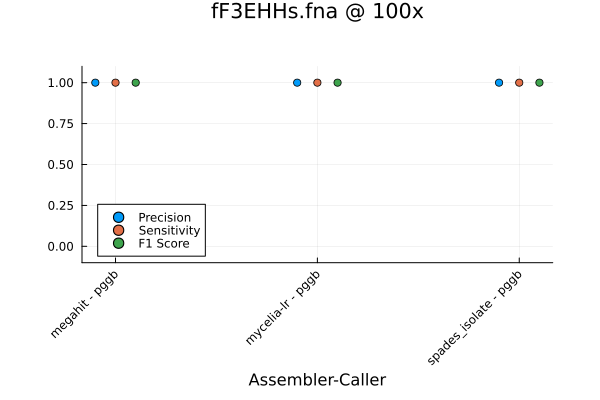

In [259]:
variant_call_accuracy_visualization_group = variant_call_accuracy_visualization_groups[2]
sort!(variant_call_accuracy_visualization_group, "assembler-caller")
this_fasta = basename(first(variant_call_accuracy_visualization_group[!, "original_fasta"]))
this_coverage = first(variant_call_accuracy_visualization_group[!, "coverage"])
title = "$(this_fasta) @ $(this_coverage)"
unique_assembler_callers = variant_call_accuracy_visualization_group[!, "assembler-caller"]
# Precision plot
StatsPlots.scatter(
    collect(1:length(unique_assembler_callers)) .- 0.1,
    variant_call_accuracy_visualization_group.precision,
    xticks = (1:length(unique_assembler_callers), unique_assembler_callers),
    xlabel = "Assembler-Caller",
    title = title,
    label = "Precision",
    ylims = (-0.1, 1.1),
    margins = 10StatsPlots.Plots.PlotMeasures.mm,
    xrotation=45,
    legend=:bottomleft
)

# Sensitivity plot
StatsPlots.scatter!(
    collect(1:length(unique_assembler_callers)),
    variant_call_accuracy_visualization_group.sensitivity,
    label = "Sensitivity"
)

# F1 score plot
StatsPlots.scatter!(
    collect(1:length(unique_assembler_callers)) .+ 0.1,
    variant_call_accuracy_visualization_group.f_measure,
    label = "F1 Score"
)

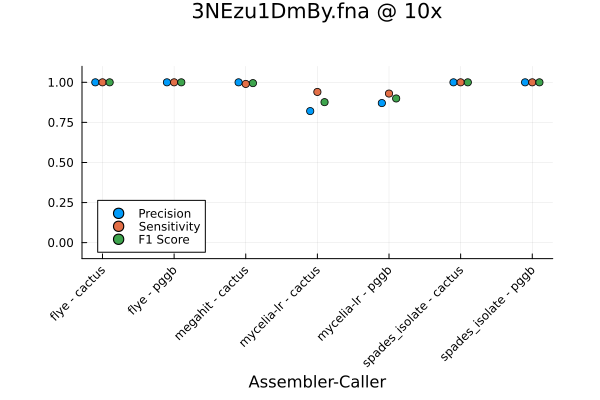

In [258]:
variant_call_accuracy_visualization_group = variant_call_accuracy_visualization_groups[3]
sort!(variant_call_accuracy_visualization_group, "assembler-caller")
this_fasta = basename(first(variant_call_accuracy_visualization_group[!, "original_fasta"]))
this_coverage = first(variant_call_accuracy_visualization_group[!, "coverage"])
title = "$(this_fasta) @ $(this_coverage)"
unique_assembler_callers = variant_call_accuracy_visualization_group[!, "assembler-caller"]
# Precision plot
StatsPlots.scatter(
    collect(1:length(unique_assembler_callers)) .- 0.1,
    variant_call_accuracy_visualization_group.precision,
    xticks = (1:length(unique_assembler_callers), unique_assembler_callers),
    xlabel = "Assembler-Caller",
    title = title,
    label = "Precision",
    ylims = (-0.1, 1.1),
    margins = 10StatsPlots.Plots.PlotMeasures.mm,
    xrotation=45,
    legend=:bottomleft
)

# Sensitivity plot
StatsPlots.scatter!(
    collect(1:length(unique_assembler_callers)),
    variant_call_accuracy_visualization_group.sensitivity,
    label = "Sensitivity"
)

# F1 score plot
StatsPlots.scatter!(
    collect(1:length(unique_assembler_callers)) .+ 0.1,
    variant_call_accuracy_visualization_group.f_measure,
    label = "F1 Score"
)

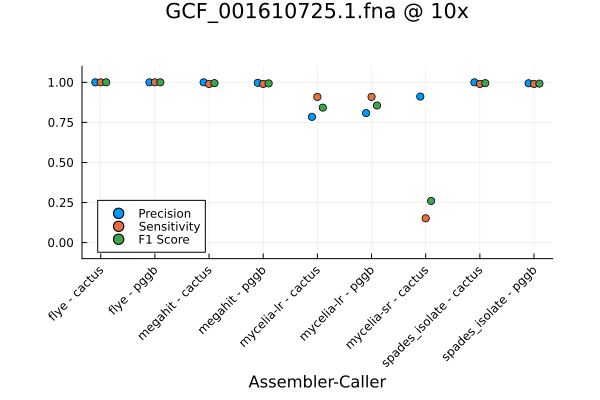

In [257]:
variant_call_accuracy_visualization_group = variant_call_accuracy_visualization_groups[4]
sort!(variant_call_accuracy_visualization_group, "assembler-caller")
this_fasta = basename(first(variant_call_accuracy_visualization_group[!, "original_fasta"]))
this_coverage = first(variant_call_accuracy_visualization_group[!, "coverage"])
title = "$(this_fasta) @ $(this_coverage)"
unique_assembler_callers = variant_call_accuracy_visualization_group[!, "assembler-caller"]
# Precision plot
StatsPlots.scatter(
    collect(1:length(unique_assembler_callers)) .- 0.1,
    variant_call_accuracy_visualization_group.precision,
    xticks = (1:length(unique_assembler_callers), unique_assembler_callers),
    xlabel = "Assembler-Caller",
    title = title,
    label = "Precision",
    ylims = (-0.1, 1.1),
    margins = 10StatsPlots.Plots.PlotMeasures.mm,
    xrotation=45,
    legend=:bottomleft
)

# Sensitivity plot
StatsPlots.scatter!(
    collect(1:length(unique_assembler_callers)),
    variant_call_accuracy_visualization_group.sensitivity,
    label = "Sensitivity"
)

# F1 score plot
StatsPlots.scatter!(
    collect(1:length(unique_assembler_callers)) .+ 0.1,
    variant_call_accuracy_visualization_group.f_measure,
    label = "F1 Score"
)

In [154]:
# assembly_table_to_visualize

In [ ]:
# gold standard =
# normalized de novo

In [ ]:
# for all of the PGGB vcfs, normalize and sort them

In [ ]:
# for all of the cactus vcfs, normalize and sort them

In [ ]:
# for all of the vcfs, RTG eval them and get the precision and recall data

In [ ]:
# load those up into all and best case call thresholds